In [101]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
website = "https://ev-database.org/#sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~450|range-slider-battery:prev~next=10~200|range-slider-towweight:prev~next=0~2500|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=9"

In [6]:
# Get request
response = requests.get(website)
#status code (200: OK)
response.status_code

In [8]:
# Soup object
soup = BeautifulSoup(response.content, 'html.parser') 

In [10]:
# results
results = soup.find_all('div', {'class':'list-item'})
len(results) # 261 items

In [23]:
Brand = []
Model = []
Power = []
Acceleration = []
Topspeed = []
Range = []
Efficiency = []
priceDE = []


for result in results:
    #
    try:
        Brand.append(result.find('h2').get_text().split()[0])
    except:
        Brand.append("n/a")

    try:
        Model.append(result.find('h2').get_text().partition(' ')[2])
    except:
        Model.append("n/a")
    
    try:
        Power.append(result.find('div', {'class':'subtitle'}).get_text())
    except:
        Power.append("n/a")

    try:
        Acceleration.append(result.find('span', {'class':'acceleration'}).get_text().strip())
    except:
        Acceleration.append("n/a")
        
    try:
        Topspeed.append(result.find('span', {'class':'topspeed'}).get_text())
    except:
        Topspeed.append("n/a")
        
    try:
        Range.append(result.find('span', {'class':'erange_real'}).get_text())
    except:
        Range.append("n/a")
        
    try:
        Efficiency.append(result.find('span', {'class':'efficiency'}).get_text())
    except:
        Efficiency.append("n/a")
    try:
        priceDE.append(result.find('span', {'class':'country_de'}).get_text())
    except:
        priceDE.append("n/a")

In [24]:
ev_data = pd.DataFrame({
    
    'Brand': Brand,
    'Model':Model,
    "Power" : Subtitle,
    "Acceleration" : Acceleration,
    "Topspeed" : Topspeed,
    "Range" : Range,
    "Efficiency" : Efficiency,
    "priceDE" : priceDE
 

})

In [25]:
ev_data.head()

,Brand,Model,Power,Acceleration,Topspeed,Range,Efficiency,priceDE
0,Tesla,Model 3 Long Range Dual Motor,\n Battery Electric Vehicle | \n\t\t\...,4.4 sec,233 km/h,485 km,155 Wh/km,"€62,465"
1,Tesla,Model Y Long Range Dual Motor,\n Battery Electric Vehicle | \n\t\t\...,5.0 sec,217 km/h,435 km,172 Wh/km,"€59,965"
2,Tesla,Model 3,\n Battery Electric Vehicle | \n\t\t\...,6.1 sec,225 km/h,380 km,151 Wh/km,"€52,965"
3,MG,MG4 Electric 64 kWh,\n Battery Electric Vehicle | \n\t\t\...,7.9 sec,160 km/h,365 km,169 Wh/km,"€35,990"
4,Honda,e,\n Battery Electric Vehicle | \n\t\t\...,9.0 sec,145 km/h,170 km,168 Wh/km,"€33,850"


In [26]:
ev_data['Power'] = ev_data["Power"].apply(lambda x:x.strip('\n Battery Electric Vehicle | \n\t\t\t\t\t').strip(" kWh *\n              "))
ev_data['Acceleration'] = ev_data["Acceleration"].apply(lambda x:x.strip('sec'))
ev_data['Topspeed'] = ev_data["Topspeed"].apply(lambda x:x.strip('km/h'))
ev_data['Topspeed'] = ev_data["Topspeed"].apply(lambda x:x.strip('k'))
ev_data['Range'] = ev_data["Range"].apply(lambda x:x.strip('km'))
ev_data['Efficiency'] = ev_data["Efficiency"].apply(lambda x:x.strip('Wh/km'))

ev_data['priceDE'] = ev_data["priceDE"].apply(lambda x:x.strip('€'))
ev_data['priceDE'] = ev_data["priceDE"].apply(lambda x:x.strip('*€'))
ev_data['priceDE'] = ev_data["priceDE"].apply(lambda x:x.strip(' €'))
ev_data['priceDE'] = ev_data["priceDE"].apply(lambda x: x.replace(',','')).dropna().reset_index(drop=True)

ev_data = ev_data[ev_data.priceDE != 'N/A']


In [42]:
ev_data["Power"] = ev_data.Power.astype(float)
ev_data["Acceleration"] = ev_data.Acceleration.astype(float)
ev_data["Topspeed"] = ev_data.Topspeed.astype(float)
ev_data["Range"] = ev_data.Range.astype(float)
ev_data["Efficiency"] = ev_data.Efficiency.astype(float)
ev_data["Acceleration"] = ev_data.Acceleration.astype(float)
ev_data["priceDE"] = ev_data.priceDE.astype(int)

In [72]:
ev_data.head()

,Brand,Model,Power,Acceleration,Topspeed,Range,Efficiency,priceDE
0,Tesla,Model 3 Long Range Dual Motor,75.0,4.4,233.0,485.0,155.0,62465
1,Tesla,Model Y Long Range Dual Motor,75.0,5.0,217.0,435.0,172.0,59965
2,Tesla,Model 3,57.5,6.1,225.0,380.0,151.0,52965
3,MG,MG4 Electric 64 kWh,61.7,7.9,160.0,365.0,169.0,35990
4,Honda,e,28.5,9.0,145.0,170.0,168.0,33850


In [79]:
car = ev_data
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         238 non-null    object 
 1   Model         238 non-null    object 
 2   Power         238 non-null    float64
 3   Acceleration  238 non-null    float64
 4   Topspeed      238 non-null    float64
 5   Range         238 non-null    float64
 6   Efficiency    238 non-null    float64
 7   priceDE       238 non-null    int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 23.9+ KB


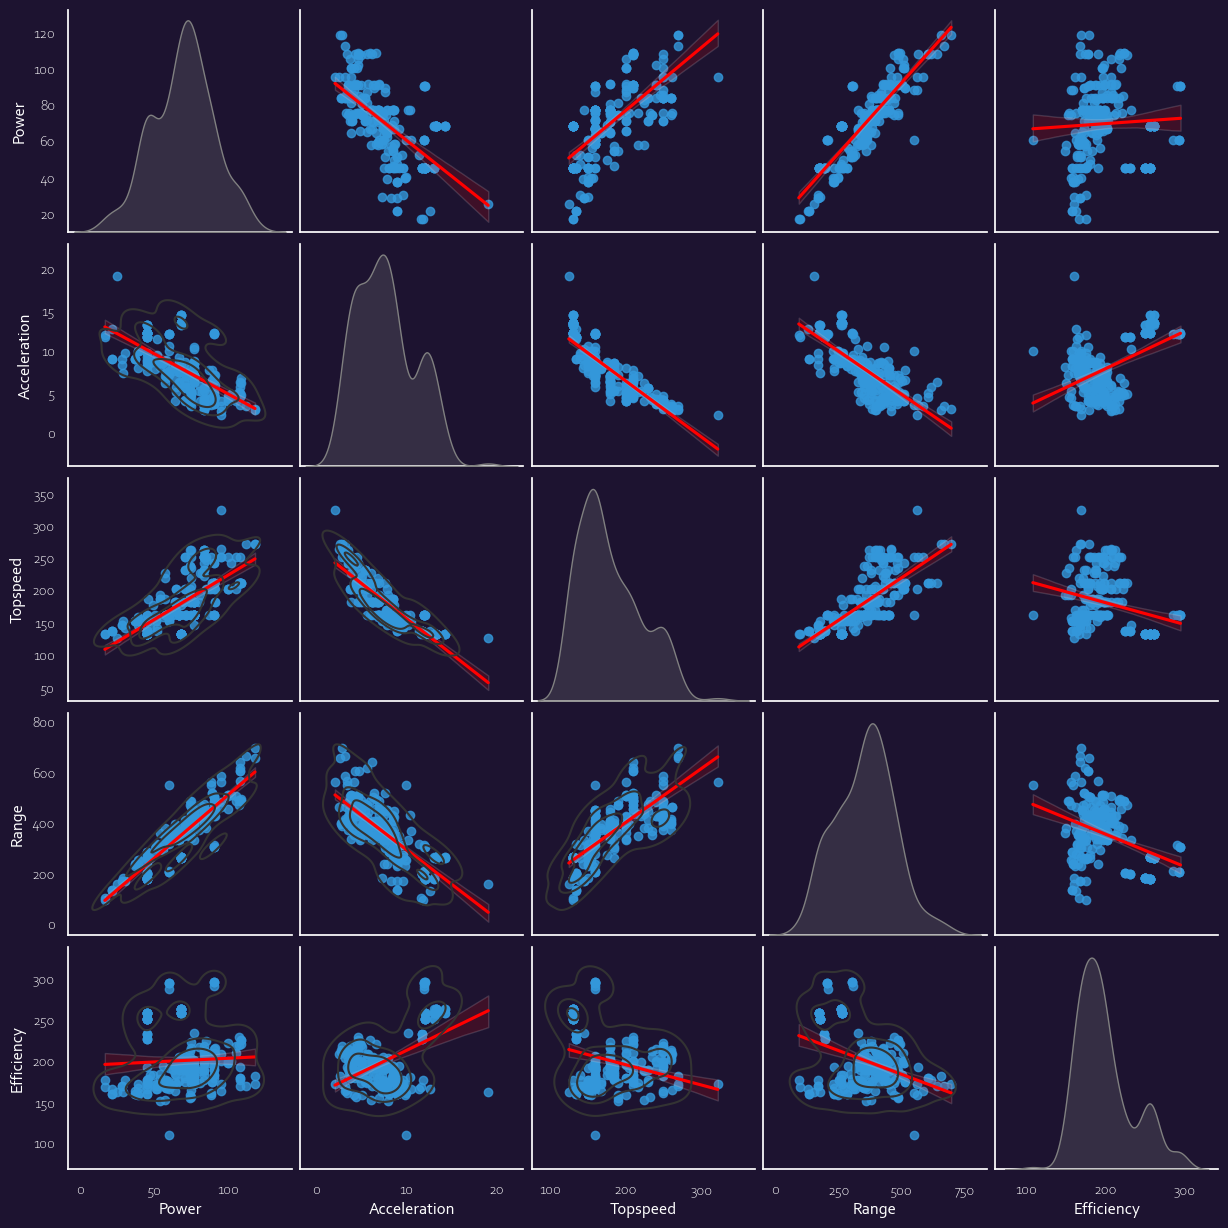

In [70]:
cols = ['Power','Acceleration','Topspeed','Range','Efficiency']

sns.set(rc={'axes.facecolor':'#1d1330', 'figure.facecolor':'#1d1330', 'axes.grid' : False})

plt.rcParams.update({"font.family": "Corbel", "font.weight": "light"})
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"

g2 = sns.pairplot(car[cols], diag_kind='kde',kind='reg', 
plot_kws={'line_kws':{'color':'red'}, 'color':'#3498DB'},
diag_kws={'color':'grey'})
g2.map_lower(sns.kdeplot, levels=4, color=".2")


Text(0.5, 1.0, 'Electric Vehicles - Price vs Range')

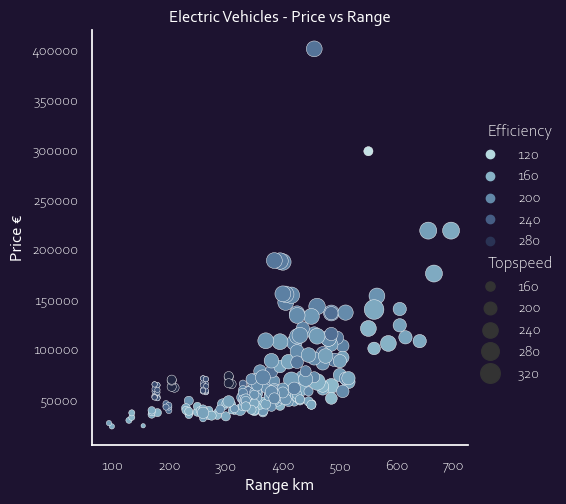

In [71]:

DARKBLUE = "#1d1330"

sns.set(rc={'axes.facecolor':'#1d1330', 'figure.facecolor':'#1d1330', 'axes.grid' : False})

plt.rcParams.update({"font.family": "Corbel", "font.weight": "light"})
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=car,
    x="Range", y="priceDE",
    hue="Efficiency", size="Topspeed",
    palette=cmap, sizes=(10, 200),
)

plt.xlabel("Range km")
plt.ylabel("Price €")
plt.title("Electric Vehicles - Price vs Range")
